"Penerapan Decision Tree untuk Klasifikasi Produk dan Sistem Rekomendasi Sederhana pada Dataset Review Amazon"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/drive/MyDrive/Proyek Data mining/amazon.csv'
df = pd.read_csv(file_path)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Cek dan bersihkan data
df.info()
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Lihat kolom yang tersedia
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [ ]:
# Buat label biner: Positif (rating >= 4), Negatif (rating <= 2), netral dihapus

if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df = df.dropna(subset=['rating'])
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
else:
    print("Kolom 'rating' tidak ditemukan dalam DataFrame.")




<ipython-input-16-016be6e855fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)


In [ ]:
#  TF-IDF vektorisasi teks ulasan
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review_content'])

# Target label
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training model Decision Tree
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.20      0.28        75
           1       0.77      0.93      0.84       218

    accuracy                           0.74       293
   macro avg       0.63      0.56      0.56       293
weighted avg       0.70      0.74      0.70       293

Accuracy: 0.7406143344709898


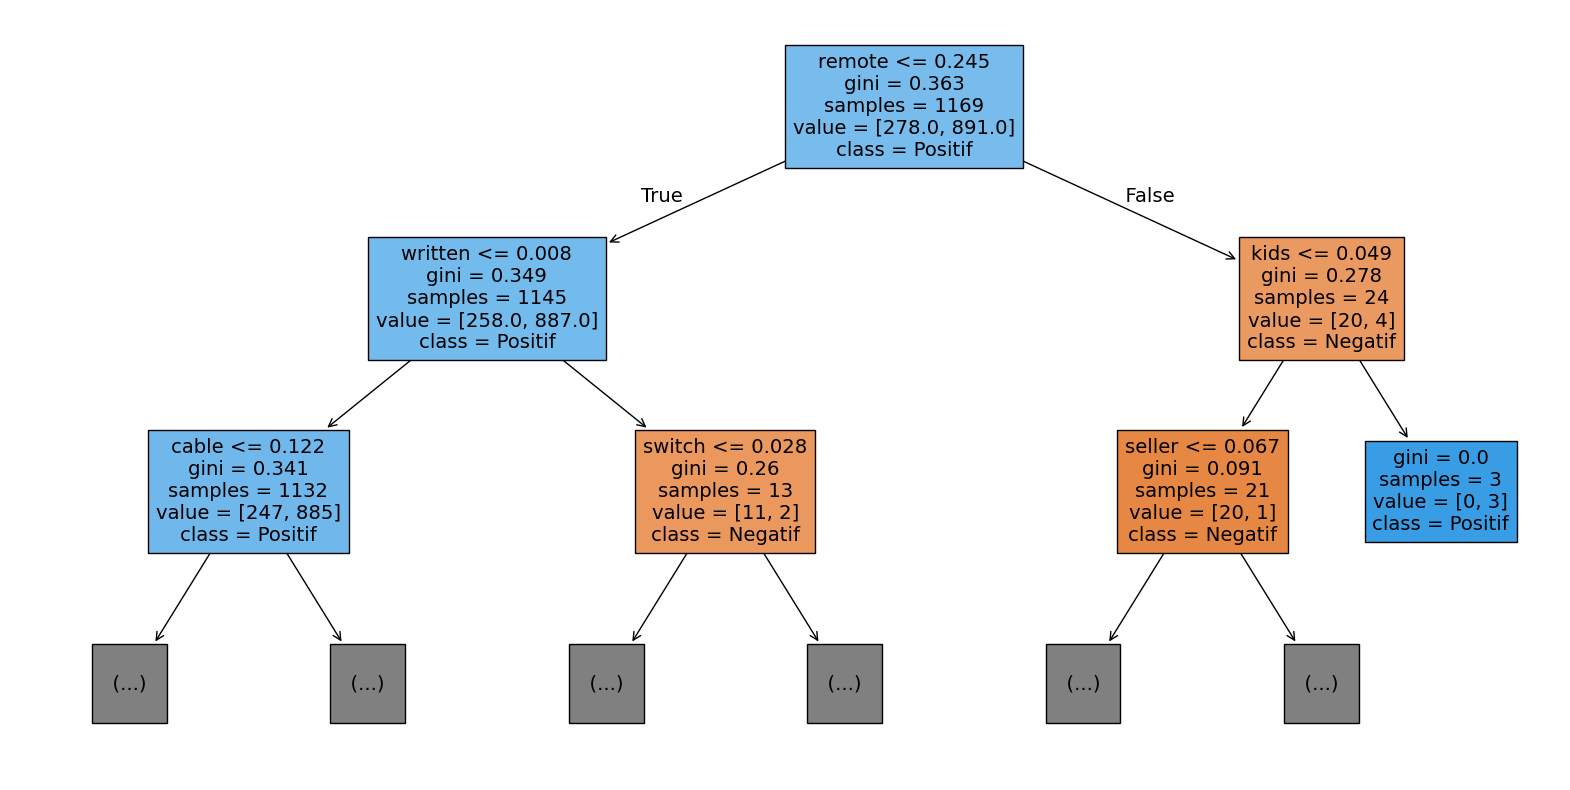

In [ ]:
#  Visualisasi tree
plt.figure(figsize=(20,10))
plot_tree(model, max_depth=2, feature_names=vectorizer.get_feature_names_out(), class_names=['Negatif', 'Positif'], filled=True)
plt.show()


In [ ]:
# Rekomendasi berdasarkan kesamaan ulasan (cosine similarity)
tfidf_matrix = vectorizer.fit_transform(df['review_content'])
cos_sim = cosine_similarity(tfidf_matrix)

# Fungsi rekomendasi
def recommend_reviews(index, top_n=5):
    scores = list(enumerate(cos_sim[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    recommended_idx = [i[0] for i in scores[1:top_n+1]]
    return df.iloc[recommended_idx][['review_content', 'rating']]

# Contoh rekomendasi
sample_index = 10  # index ulasan tertentu
print("Ulasan asli:\n", df.iloc[sample_index]['review_content'])
print("\nRekomendasi ulasan serupa:")
recommend_reviews(sample_index)


Ulasan asli:
 The cable is efficient in fast charging but in quick data transfer. Overall fine.,I like the usb c  L shape. Nylon Shielded core wire it improves the life of the cable.,i think i buy these every 6 months or so. fast charging stops working after a while. probbly something to do with the cable design. the cable gets twisted over time and I suspect that breaks the high capacity wires inside. but i keep buying it because there arent too many options in an L shaped design,Good and durable product. Sometime the charges doesn't work on few adapters. there might be few cut off or something but works fine on apple adapter, Car charger, USB,The product is really good at affordable price.,Good and fast charging, and value for money,பொருள் உடைய கடினத்தன்மையின் நன்றாக உள்ளது சார்ஜ் ஏறும் வேகம் 15wat,Not a fast charger.  Very slow charging with 65w.  L-shape pin is very useful.

Rekomendasi ulasan serupa:


,review_content,rating
426,The cable is efficient in fast charging but in...,4.3
671,The cable is efficient in fast charging but in...,4.3
99,"Good,,Quality of cable is good and fast chargi...",4.1
272,"Good,,Quality of cable is good and fast chargi...",4.1
27,The product seems and works good but it's not ...,4.0


EDA dan Preprocessing

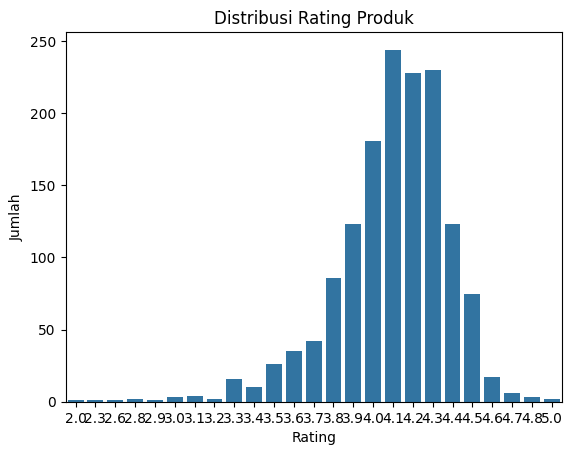

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter the DataFrame
filtered_df = df[df['rating'] <= 5.0]

sns.countplot(x='rating', data=filtered_df)
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

['Good budget mfi certified lightly cable for this price . Update usage review after 3 to 5 months .,Better than the original one in matter of robustness and durability. Better in prospect of charging . It is far better in durability from the original apple wire. Do not think more you can buy blindly worth to buy and it is mfi certified so you IOS device not damaged. But small negative point is packaging quality of the product.,The charger is a great carry on accessory while travelling without risking the original charger.Price is also very affordable and charging speed is very good with good adaptor or power bank.,Good product , can recommend all , only thing I see as issue is the material,, the cable threads peels off when stick to a Velcro materials. Other wise good product, charges very well like original,Nice,Reliable and worth it,The cable shipped in box made by Apple felt less sturdy and reliable after using one or two times and felt it would break more quickly at the lighting p

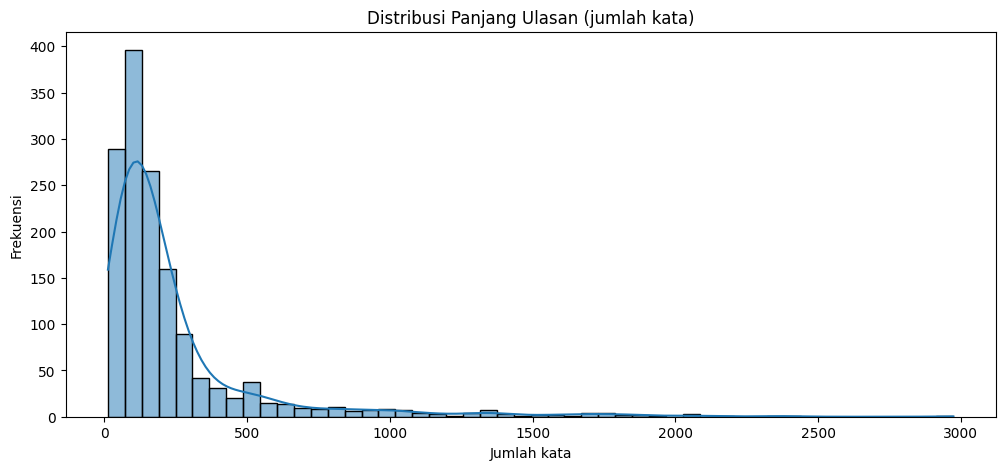

In [ ]:
# Cek contoh review
print(df['review_content'].sample(5).values)

# Tambahkan panjang karakter & kata
df['char_count'] = df['review_content'].apply(len)
df['word_count'] = df['review_content'].apply(lambda x: len(str(x).split()))

# Plot histogram panjang review
plt.figure(figsize=(12,5))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribusi Panjang Ulasan (jumlah kata)')
plt.xlabel('Jumlah kata')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
import re
import string

# Drop baris kosong
df = df.dropna(subset=['review_content', 'rating'])

# Label Sentimen: Positif (>=4), Negatif (<=2), Netral (3) dihapus
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Preprocessing teks
def clean_text(text):
    text = text.lower()  # huruf kecil semua
    text = re.sub(r'http\S+', '', text)  # hapus link
    text = re.sub(r'@\w+|#\w+', '', text)  # hapus mention & hashtag
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.strip()  # hapus spasi di awal/akhir
    return text

df['clean_text'] = df['review_content'].apply(clean_text)
df[['review_content', 'clean_text']].head()


,review_content,clean_text
0,Looks durable Charging is fine tooNo complains...,looks durable charging is fine toono complains...
1,I ordered this cable to connect my phone to An...,i ordered this cable to connect my phone to an...
2,"Not quite durable and sturdy,https://m.media-a...",not quite durable and sturdy good nice product...
3,"Good product,long wire,Charges good,Nice,I bou...",good productlong wirecharges goodnicei bought ...
4,"Bought this instead of original apple, does th...",bought this instead of original apple does the...


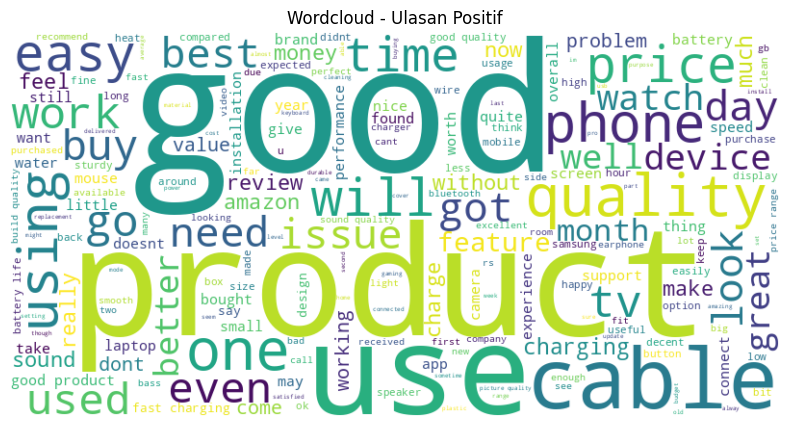

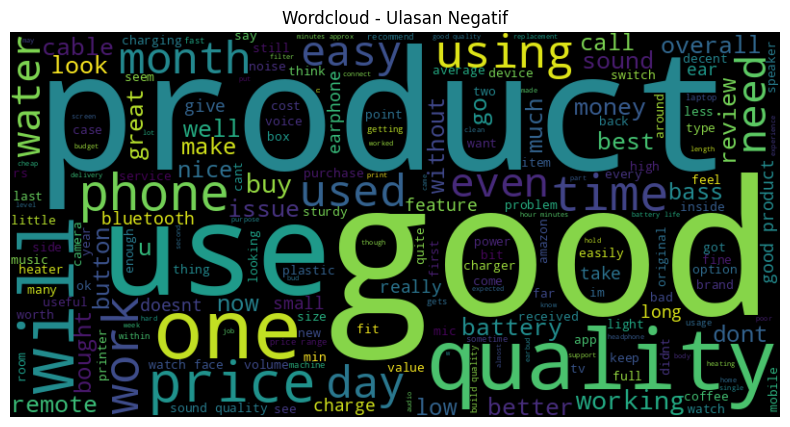

In [ ]:
#Analisis Kata (Word Frequency Analysis)
from collections import Counter
from wordcloud import WordCloud

# Gabungkan semua teks positif
positive_text = ' '.join(df[df['sentiment'] == 1]['clean_text'])
negative_text = ' '.join(df[df['sentiment'] == 0]['clean_text'])

# Wordcloud Positif
plt.figure(figsize=(10,5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Wordcloud - Ulasan Positif')
plt.axis('off')
plt.show()

# Wordcloud Negatif
plt.figure(figsize=(10,5))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Wordcloud - Ulasan Negatif')
plt.axis('off')
plt.show()


Feature Extraction dan Feature Selection

In [ ]:
# Feature Extraction dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Ekstraksi fitur dari teks bersih
tfidf = TfidfVectorizer(max_features=1500, stop_words='english')
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Tampilkan bentuk matriks fitur
print("Bentuk matriks TF-IDF:", X_tfidf.shape)


Bentuk matriks TF-IDF: (1459, 1500)


In [ ]:
#Feature Selection dengan Chi-Square
from sklearn.feature_selection import SelectKBest, chi2

# Target label
y = df['sentiment']

# Seleksi fitur terbaik
k = 1000  # pilih 1000 fitur terbaik
chi2_selector = SelectKBest(chi2, k=k)
X_selected = chi2_selector.fit_transform(X_tfidf, y)

# Cek bentuk matriks fitur hasil seleksi
print("Fitur setelah seleksi:", X_selected.shape)


Fitur setelah seleksi: (1459, 1000)


In [ ]:
# Dapatkan fitur terpilih
selected_mask = chi2_selector.get_support()
selected_features = np.array(tfidf.get_feature_names_out())[selected_mask]

# Tampilkan beberapa fitur terpilih
print("Contoh fitur terpilih:", selected_features[:20])


Contoh fitur terpilih: ['absolutely' 'access' 'accessories' 'accuracy' 'accurate' 'actual'
 'actually' 'adapters' 'add' 'adds' 'adjustable' 'affordable' 'ago' 'air'
 'alarm' 'alright' 'ambrane' 'amp' 'amps' 'anc']


training model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Inisialisasi dan training model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi
y_pred = dt_model.predict(X_test)




Evaluasi model




In [ ]:
# Akurasi dan laporan klasifikasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7226027397260274

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.07      0.11        73
           1       0.75      0.94      0.84       219

    accuracy                           0.72       292
   macro avg       0.51      0.50      0.47       292
weighted avg       0.63      0.72      0.65       292



Confusion Matrix

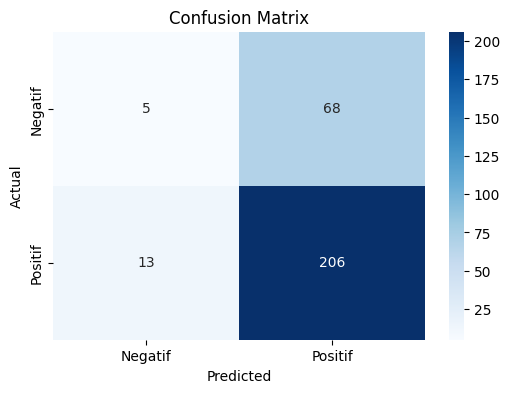

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Visualisasi

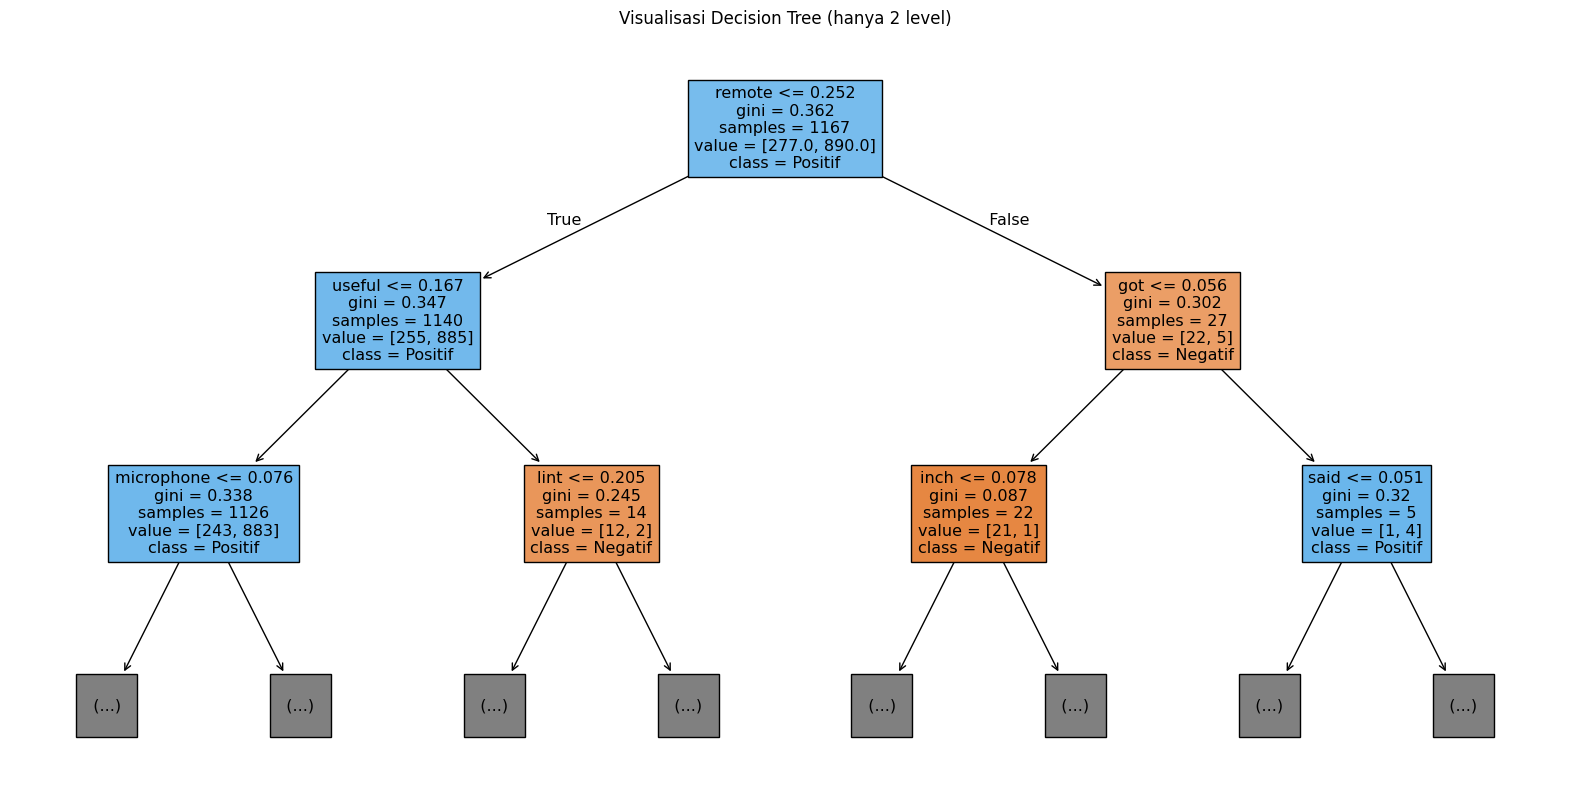

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model,
          max_depth=2,
          feature_names=selected_features,
          class_names=['Negatif', 'Positif'],
          filled=True)
plt.title("Visualisasi Decision Tree (hanya 2 level)")
plt.show()
